# Object Localization with TensorFlow

Created for the Coursera Guided Project: [Object Localization with TensorFlow](https://www.coursera.org/projects/object-localization-tensorflow)

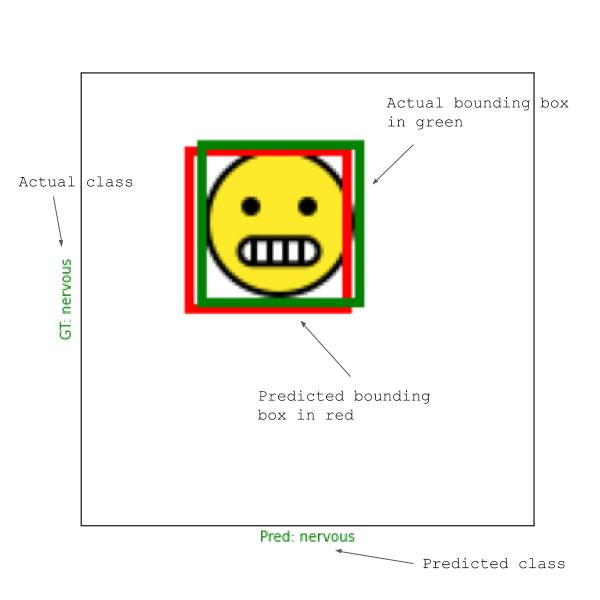

All emojis designed by [OpenMoji](https://openmoji.org/) – the open-source emoji and icon project. License: CC BY-SA 4.0

## Task 2: Download and Visualize Data

In [1]:
# !wget https://github.com/hfg-gmuend/openmoji/releases/latest/download/openmoji-72x72-color.zip #Collect the emojis data
# !mkdir emojis                                                                                  #Make "emojis" directory
# !unzip -q openmoji-72x72-color.zip -d ./emojis                                                 #Unzip the data to "emojis" directory

In [2]:
%matplotlib inline

import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image, ImageDraw
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout #Import some useful libraries

print('Using TensorFlow version', tf.__version__) #Tensorflow version check

Using TensorFlow version 2.9.1


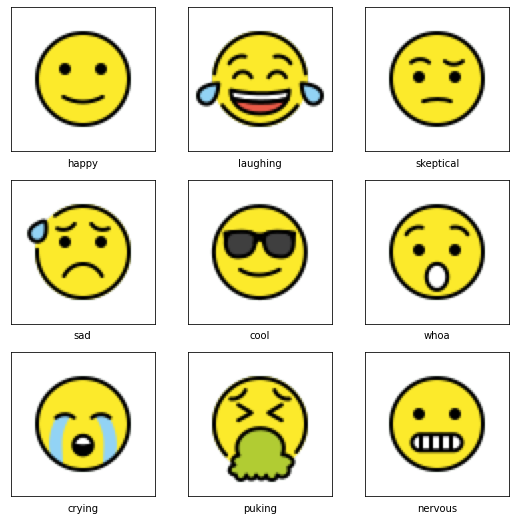

In [3]:
emojis = {
    0: {'name': 'happy', 'file': '1F642.png'},
    1: {'name': 'laughing', 'file': '1F602.png'},
    2: {'name': 'skeptical', 'file': '1F928.png'},
    3: {'name': 'sad', 'file': '1F630.png'},
    4: {'name': 'cool', 'file': '1F60E.png'},
    5: {'name': 'whoa', 'file': '1F62F.png'},
    6: {'name': 'crying', 'file': '1F62D.png'},
    7: {'name': 'puking', 'file': '1F92E.png'},
    8: {'name': 'nervous', 'file': '1F62C.png'} #Some example images
}

plt.figure(figsize=(9, 9))

for i, (j, e) in enumerate(emojis.items()):
    plt.subplot(3, 3, i + 1)                                  #Plot images 3x3
    plt.imshow(plt.imread(os.path.join('datasets/emojis', e['file']))) #imshow: Show image, imread: Read image, os.path.join: Add file to the path
    plt.xlabel(e['name'])                                     #Add class label on x axis 
    plt.xticks([])
    plt.yticks([])
plt.show()

## Task 3: Create Examples

In [5]:
for class_id, values in emojis.items():                                            #Take class_id and values in emojis.items
    png_file = Image.open(os.path.join('datasets/emojis', values['file'])).convert('RGBA')  #Open image in emojis, then convert them to RGBA 
    png_file.load()                                                                #Load image
    new_file = Image.new("RGB", png_file.size, (255, 255, 255))                    #Create a new image with all white
    new_file.paste(png_file, mask=png_file.split()[3])                             #Paste emoji image on new image
    emojis[class_id]['image'] = new_file                                           #Add "image" key to emojis for keep PIL value

In [6]:
emojis

{0: {'name': 'happy',
  'file': '1F642.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72>},
 1: {'name': 'laughing',
  'file': '1F602.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72>},
 2: {'name': 'skeptical',
  'file': '1F928.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72>},
 3: {'name': 'sad',
  'file': '1F630.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72>},
 4: {'name': 'cool',
  'file': '1F60E.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72>},
 5: {'name': 'whoa',
  'file': '1F62F.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72>},
 6: {'name': 'crying',
  'file': '1F62D.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72>},
 7: {'name': 'puking',
  'file': '1F92E.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72>},
 8: {'name': 'nervous',
  'file': '1F62C.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72>}}

In [7]:
def create_example():
  class_id = np.random.randint(0, 9)                                          #Random choose an int from 0 to 9 for class_id
  image = np.ones((144, 144, 3)) * 255                                        #Create an 144x144x3 (white because of 255) array, call "image"
  row = np.random.randint(0, 72)                                              #Random choose an int from 0 to 72, call row
  col = np.random.randint(0, 72)                                              #Random choose an int from 0 to 72, call col
  image[row: row + 72, col: col + 72, :] = np.array(emojis[class_id]['image'])#Add PIL value to "image" from random row to row+72 and from random col to col+72
  return image.astype('uint8'), class_id, (row + 10) / 144, (col + 10) / 144  #Return image as uint8, class_id, row, col 
                                                                              #(original emoji image got 10 pixel margin on row and col, so we add 10 pix to get actual row and col, then we divide by 144 for normalize)

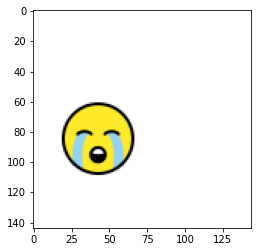

In [8]:
image, class_id, row, col = create_example()
plt.imshow(image);

## Task 4: Plot Bounding Boxes

In [9]:
def plot_bounding_box(image, gt_coords, pred_coords=[], norm=False):       #image, ground truth coordinates, prediction coordinates, normalization flag
  if norm:                                                                 #if normalization flag is True,(it means our image values are normalized)
    image *= 255.                                                             #then image values will be de-normalized
    image = image.astype('uint8')                                             #and it will become an unsigned integer as a type. So we can use the image
  image = Image.fromarray(image)                                           #with "fromarray", we can display the image
  draw = ImageDraw.Draw(image)                                             #for drawing the bounding box on the image

  row, col = gt_coords
  row *= 144                                                               #multiply by 144 for de-normalized
  col *= 144
  draw.rectangle((col, row, col + 52, row + 52), outline='green', width=3) #Draw a green rectangle on image with from row to row+52 and from col to col+52(ground truth)

  if len(pred_coords) == 2:                                                #If length of prediction coordinates are 2(row and col)
    row, col = pred_coords
    row *= 144
    col *= 144
    draw.rectangle((col, row, col + 52, row + 52), outline='red', width=3) #Draw a red rectangle on image with from row to row+52 and from col to col+52(prediction)
  return image

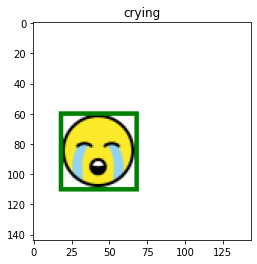

In [10]:
image = plot_bounding_box(image, gt_coords=[row, col])
plt.imshow(image)
plt.title(emojis[class_id]['name'])
plt.show()

## Task 5: Data Generator

In [11]:
def data_generator(batch_size=16):                                         #batch_size: number of training examples
  while True:
    x_batch = np.zeros((batch_size, 144, 144, 3))                          #Create a zeros array for images
    y_batch = np.zeros((batch_size, 9))                                    #Create a zeros array for classes
    bbox_batch = np.zeros((batch_size, 2))                                 #Create a zeros array for box(row, col)

    for i in range(0, batch_size):
      image, class_id, row, col = create_example()                         
      x_batch[i] = image / 255.                                            #image divide by 255 for normalizing
      y_batch[i, class_id] = 1.0                                           #Looks like => [0, 0, 0, 0, 1, 0, 0, 0, 0] (1 is for class_id if class_id is 5)
      bbox_batch[i] = np.array([row, col])                                 
    yield {'image': x_batch}, {'class_out': y_batch, 'box_out': bbox_batch}#"yield is a keyword that is used like return, except the function will return a generator"

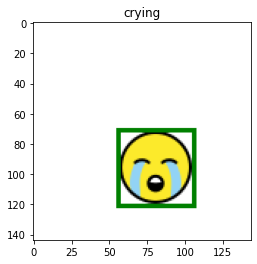

In [12]:
example, label = next(data_generator(1))           #Generate 1 example
image = example['image'][0]
class_id = np.argmax(label['class_out'][0])
coords = label['box_out'][0]

image = plot_bounding_box(image, coords, norm=True)
plt.imshow(image)
plt.title(emojis[class_id]['name'])
plt.show()

## Task 6: Model

In [13]:
input_ = Input(shape=(144, 144, 3), name='image')              #Input layer, shape is the image shape

x = input_

for i in range(0, 5):
  n_filters = 2**(4 + i)                                       
  x = Conv2D(n_filters, 3, activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(2)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)

class_out = Dense(9, activation='softmax', name='class_out')(x)#Dense layer with 9 units for class
box_out = Dense(2, name='box_out')(x)                          #Dense layer with 2 units for bounding box(row, col)

model = tf.keras.models.Model(input_, [class_out, box_out])    #Build model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 144, 144, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 142, 142, 16  448         ['image[0][0]']                  
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 142, 142, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

## Task 7: Custom Metric: IoU

In [14]:
class IoU(tf.keras.metrics.Metric):                                        #Custom IoU class, inheritance of Metric class
  def __init__(self, **kwargs):
    super(IoU, self).__init__(**kwargs)                                    #super() allow us to use Metric class' arguments
    
    self.iou = self.add_weight(name='iou', initializer='zeros')            #add_weight: "Adds a new variable to the layer"
    self.total_iou = self.add_weight(name='total_iou', initializer='zeros')
    self.num_ex = self.add_weight(name='num_ex', initializer='zeros')
  
  def update_state(self, y_true, y_pred, sample_weight=None):
    def get_box(y):                                                        #a function for getting bounding box coordinates
      rows, cols = y[:, 0], y[:, 1]
      rows, cols = rows * 144, cols * 144
      y1, y2 = rows, rows + 52
      x1, x2 = cols, cols + 52
      return x1, y1, x2, y2
    
    def get_area(x1, y1, x2, y2):                                          #a function for getting area of bounding box
      return tf.math.abs(x2 - x1) * tf.math.abs(y2 - y1)
    
    gt_x1, gt_y1, gt_x2, gt_y2 = get_box(y_true)                           #getting ground truth bounding box coordinates
    p_x1, p_y1, p_x2, p_y2 = get_box(y_pred)                               #getting prediction bounding box coordinates

    i_x1 = tf.maximum(gt_x1, p_x1)                                         #return the maximum of gt_x1 and p_x1, assign to i_x1
    i_y1 = tf.maximum(gt_y1, p_y1)                                         #return the maximum of gt_x1 and p_x1, assign to i_x1
    i_x2 = tf.minimum(gt_x2, p_x2)                                         #return the maximum of gt_x1 and p_x1, assign to i_x1
    i_y2 = tf.minimum(gt_y2, p_y2)                                         #return the maximum of gt_x1 and p_x1, assign to i_x1
    
    i_area = get_area(i_x1, i_y1, i_x2, i_y2)                              #area of intersection(or overlap)
    u_area = get_area(gt_x1, gt_y1, gt_x2, gt_y2) + get_area(p_x1, p_y1, p_x2, p_y2) - i_area #area of union

    iou = tf.math.divide(i_area, u_area)                                   #calculate the iou
    self.num_ex.assign_add(1)
    self.total_iou.assign_add(tf.reduce_mean(iou))                         #tf.reduce_mean():"Computes the mean of elements across dimensions of a tensor"
    self.iou = tf.math.divide(self.total_iou, self.num_ex)                 #total_iou divide by num_ex, then assign to iou
  
  def result(self):
    return self.iou                                                       
  
  def reset_state(self):                                                   #reseting the state
    self.iou = self.add_weight(name='iou', initializer='zeros')            
    self.total_iou = self.add_weight(name='total_iou', initializer='zeros')
    self.num_ex = self.add_weight(name='num_ex', initializer='zeros')


## Task 8: Compile the Model

In [15]:
model.compile(
    loss={
        'class_out': 'categorical_crossentropy',            #we have 2 outputs, one of which is class_out and we use "categorical_crossentropy" loss for it because class_out will be chosen from an array of 9 classes
        'box_out': 'mse'                                    #one of which is box_out, we use mse(mean squared error) loss for it because box_out return 2 numeric value(row and col)
    },
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics={
        'class_out': 'accuracy',                            #we use "accuracy" metric for class_out
        'box_out': IoU(name='iou')                          #and use our custom IoU class for box_out metric
    }
)

## Task 9: Custom Callback: Model Testing

In [16]:
def test_model(model, test_datagen):    #a function for test the model
  example, label = next(test_datagen)
  x = example['image']
  y = label['class_out']
  box = label['box_out']

  pred_y, pred_box = model.predict(x)

  pred_coords = pred_box[0]
  gt_coords = box[0]
  pred_class = np.argmax(pred_y[0])     #np.argmax: "Returns the indices of the maximum values along an axis"
  image = x[0]

  gt = emojis[np.argmax(y[0])]['name']           
  pred_class_name = emojis[pred_class]['name']

  image = plot_bounding_box(image, gt_coords, pred_coords, norm=True)
  color = 'green' if gt == pred_class_name else 'red'

  plt.imshow(image)
  plt.xlabel(f'Pred: {pred_class_name}', color=color)
  plt.ylabel(f'GT: {gt}', color=color)
  plt.xticks([])
  plt.yticks([])

In [17]:
def test(model):                   #a function for show the test result
  test_datagen = data_generator(1)

  plt.figure(figsize=(16, 4))

  for i in range(0, 6):
    plt.subplot(1, 6, i + 1)
    test_model(model, test_datagen)
  plt.show()

1/1 [==============================] - 0s 16ms/step


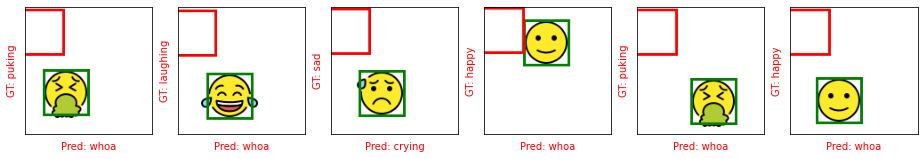

In [18]:
test(model)

In [19]:
class ShowTestImages(tf.keras.callbacks.Callback): #a custom callback to show the results of the model at the end of each epoch
  def on_epoch_end(self, epoch, logs=None):
    test(self.model)

## Task 10: Model Training

Epoch 1/50
1/1 [==============================] - 0s 24ms/step


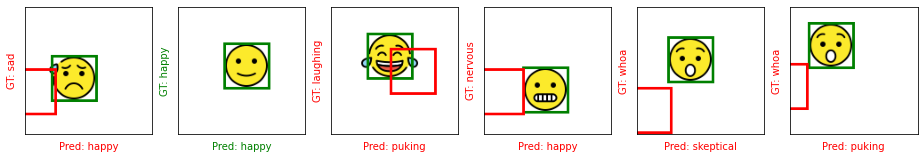

500/500 [==============================] - 149s 295ms/step - loss: 0.8716 - class_out_loss: 0.6533 - box_out_loss: 0.2183 - class_out_accuracy: 0.7781 - box_out_iou: 0.2389 - lr: 0.0010
Epoch 2/50
1/1 [==============================] - 0s 16ms/step


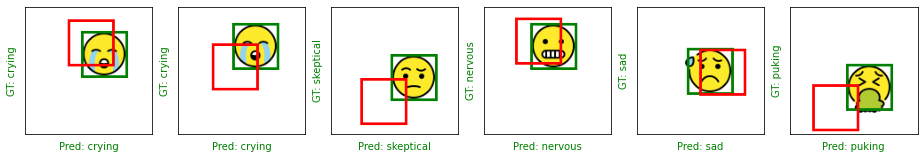

500/500 [==============================] - 152s 305ms/step - loss: 0.0288 - class_out_loss: 0.0076 - box_out_loss: 0.0212 - class_out_accuracy: 0.9998 - box_out_iou: 0.2967 - lr: 0.0010
Epoch 3/50
1/1 [==============================] - 0s 16ms/step


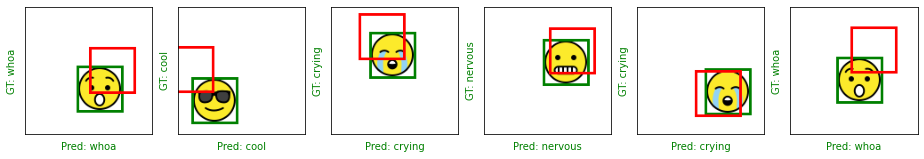

500/500 [==============================] - 152s 305ms/step - loss: 0.0128 - class_out_loss: 0.0026 - box_out_loss: 0.0102 - class_out_accuracy: 1.0000 - box_out_iou: 0.3547 - lr: 0.0010
Epoch 4/50
1/1 [==============================] - 0s 16ms/step


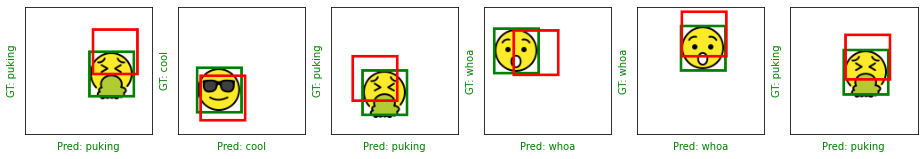

500/500 [==============================] - 154s 308ms/step - loss: 0.0076 - class_out_loss: 0.0016 - box_out_loss: 0.0060 - class_out_accuracy: 1.0000 - box_out_iou: 0.4038 - lr: 0.0010
Epoch 5/50
1/1 [==============================] - 0s 31ms/step


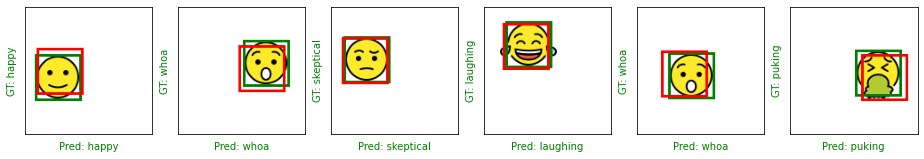

500/500 [==============================] - 153s 305ms/step - loss: 0.0034 - class_out_loss: 7.8817e-04 - box_out_loss: 0.0026 - class_out_accuracy: 1.0000 - box_out_iou: 0.4566 - lr: 2.0000e-04
Epoch 6/50
1/1 [==============================] - 0s 19ms/step


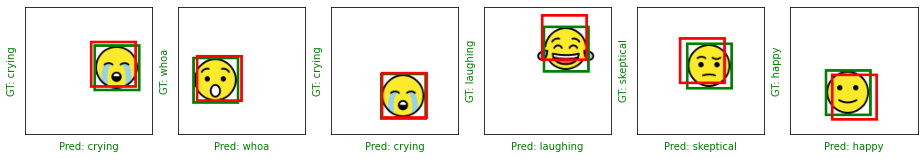

500/500 [==============================] - 154s 308ms/step - loss: 0.0027 - class_out_loss: 5.4734e-04 - box_out_loss: 0.0021 - class_out_accuracy: 1.0000 - box_out_iou: 0.4954 - lr: 2.0000e-04
Epoch 7/50
1/1 [==============================] - 0s 24ms/step


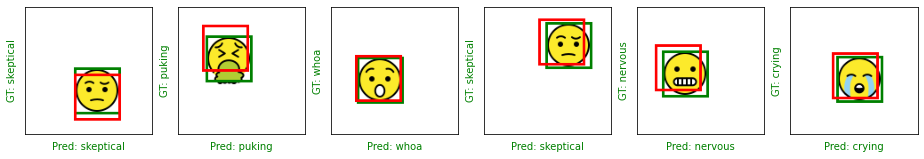

500/500 [==============================] - 152s 305ms/step - loss: 0.0024 - class_out_loss: 4.8779e-04 - box_out_loss: 0.0019 - class_out_accuracy: 1.0000 - box_out_iou: 0.5251 - lr: 2.0000e-04
Epoch 8/50
1/1 [==============================] - 0s 24ms/step


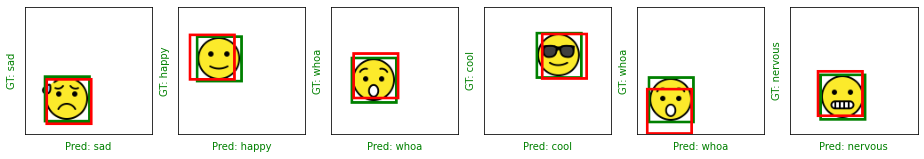

500/500 [==============================] - 153s 306ms/step - loss: 0.0023 - class_out_loss: 4.5230e-04 - box_out_loss: 0.0018 - class_out_accuracy: 1.0000 - box_out_iou: 0.5483 - lr: 2.0000e-04
Epoch 9/50
1/1 [==============================] - 0s 31ms/step


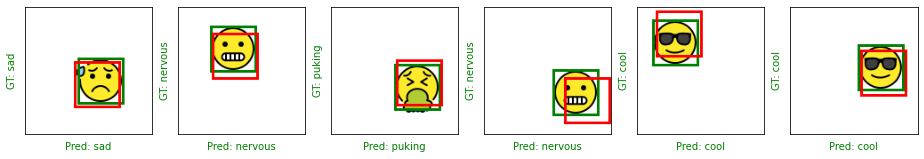

500/500 [==============================] - 153s 305ms/step - loss: 0.0021 - class_out_loss: 3.6227e-04 - box_out_loss: 0.0017 - class_out_accuracy: 1.0000 - box_out_iou: 0.5669 - lr: 2.0000e-04
Epoch 10/50
1/1 [==============================] - 0s 16ms/step


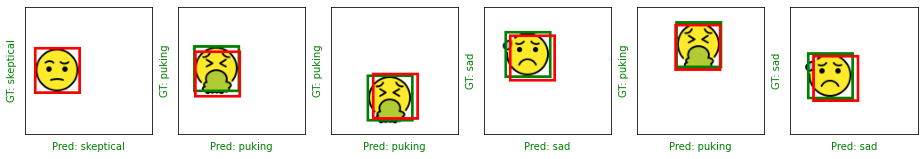

500/500 [==============================] - 153s 307ms/step - loss: 0.0016 - class_out_loss: 3.4355e-04 - box_out_loss: 0.0013 - class_out_accuracy: 1.0000 - box_out_iou: 0.5853 - lr: 4.0000e-05
Epoch 11/50
1/1 [==============================] - 0s 10ms/step


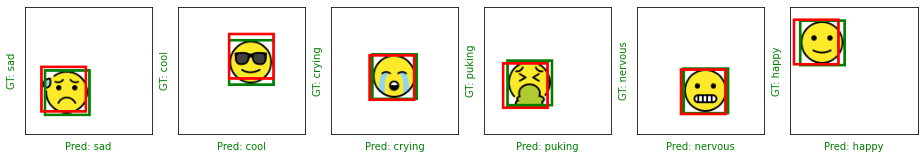

500/500 [==============================] - 153s 306ms/step - loss: 0.0015 - class_out_loss: 2.9725e-04 - box_out_loss: 0.0012 - class_out_accuracy: 1.0000 - box_out_iou: 0.6008 - lr: 4.0000e-05
Epoch 12/50
1/1 [==============================] - 0s 24ms/step


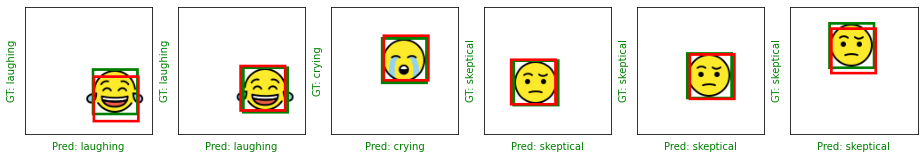

500/500 [==============================] - 153s 306ms/step - loss: 0.0015 - class_out_loss: 3.0999e-04 - box_out_loss: 0.0012 - class_out_accuracy: 1.0000 - box_out_iou: 0.6139 - lr: 4.0000e-05
Epoch 13/50
1/1 [==============================] - 0s 18ms/step


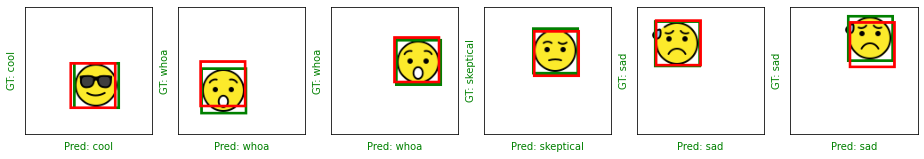

500/500 [==============================] - 153s 306ms/step - loss: 0.0013 - class_out_loss: 2.3040e-04 - box_out_loss: 0.0011 - class_out_accuracy: 1.0000 - box_out_iou: 0.6255 - lr: 4.0000e-05
Epoch 14/50
1/1 [==============================] - 0s 16ms/step


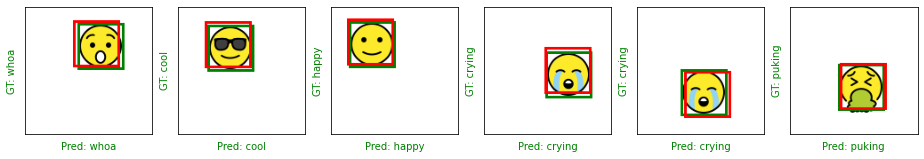

500/500 [==============================] - 153s 306ms/step - loss: 0.0013 - class_out_loss: 2.3960e-04 - box_out_loss: 0.0011 - class_out_accuracy: 1.0000 - box_out_iou: 0.6353 - lr: 4.0000e-05
Epoch 15/50
1/1 [==============================] - 0s 16ms/step


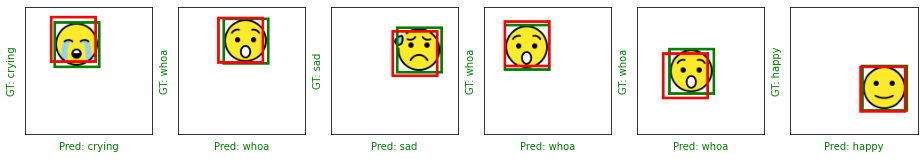

500/500 [==============================] - 157s 315ms/step - loss: 0.0012 - class_out_loss: 2.4129e-04 - box_out_loss: 9.3539e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.6448 - lr: 8.0000e-06
Epoch 16/50
1/1 [==============================] - 0s 16ms/step


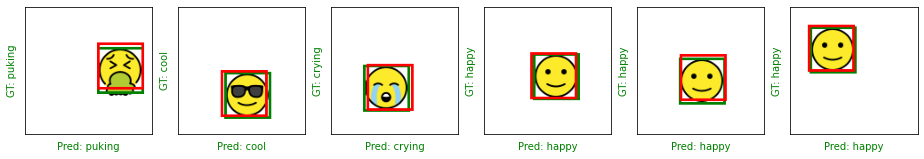

500/500 [==============================] - 155s 310ms/step - loss: 0.0012 - class_out_loss: 2.4945e-04 - box_out_loss: 9.6093e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.6532 - lr: 8.0000e-06
Epoch 17/50
1/1 [==============================] - 0s 19ms/step


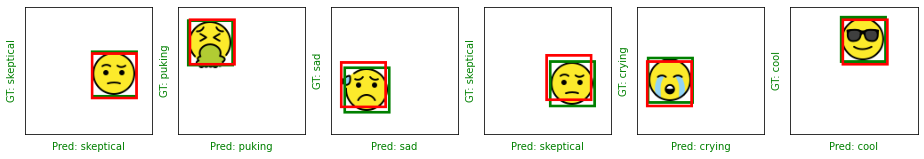

500/500 [==============================] - 154s 309ms/step - loss: 0.0012 - class_out_loss: 3.2676e-04 - box_out_loss: 9.0818e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.6607 - lr: 8.0000e-06
Epoch 18/50
1/1 [==============================] - 0s 31ms/step


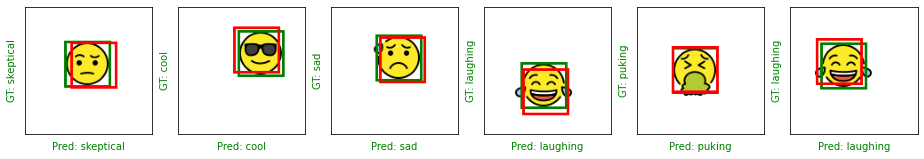

500/500 [==============================] - 155s 309ms/step - loss: 0.0011 - class_out_loss: 1.8914e-04 - box_out_loss: 9.0248e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.6675 - lr: 8.0000e-06
Epoch 19/50
1/1 [==============================] - 0s 24ms/step


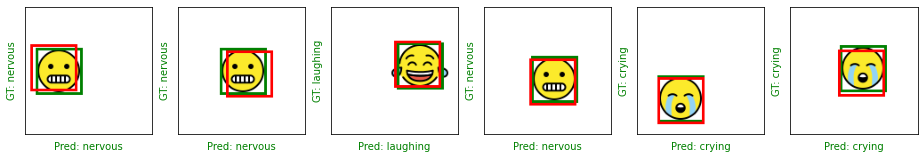

500/500 [==============================] - 155s 310ms/step - loss: 0.0010 - class_out_loss: 1.7473e-04 - box_out_loss: 8.6318e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.6737 - lr: 8.0000e-06
Epoch 20/50
1/1 [==============================] - 0s 12ms/step


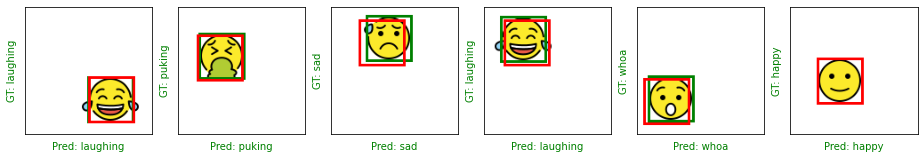

500/500 [==============================] - 155s 310ms/step - loss: 0.0011 - class_out_loss: 2.1767e-04 - box_out_loss: 8.6487e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.6793 - lr: 1.6000e-06
Epoch 21/50
1/1 [==============================] - 0s 23ms/step


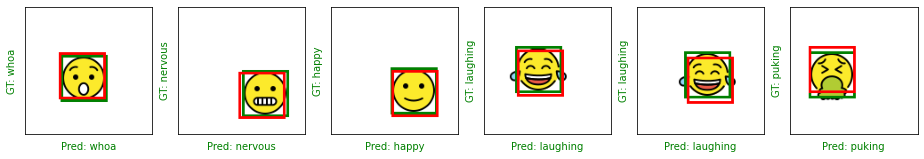

500/500 [==============================] - 158s 316ms/step - loss: 0.0010 - class_out_loss: 2.0691e-04 - box_out_loss: 8.3889e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.6845 - lr: 1.6000e-06
Epoch 22/50
1/1 [==============================] - 0s 11ms/step


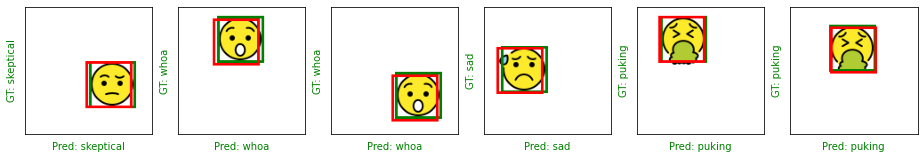

500/500 [==============================] - 163s 326ms/step - loss: 0.0010 - class_out_loss: 2.2132e-04 - box_out_loss: 8.2368e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.6893 - lr: 1.6000e-06
Epoch 23/50
1/1 [==============================] - 0s 10ms/step


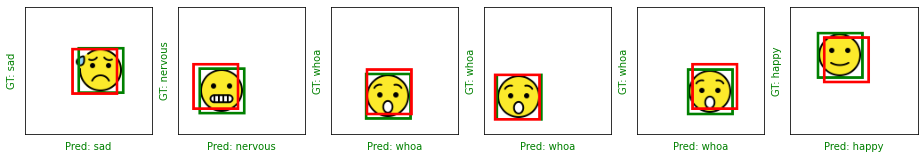

500/500 [==============================] - 159s 319ms/step - loss: 9.9004e-04 - class_out_loss: 1.7326e-04 - box_out_loss: 8.1678e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.6938 - lr: 1.6000e-06
Epoch 24/50
1/1 [==============================] - 0s 22ms/step


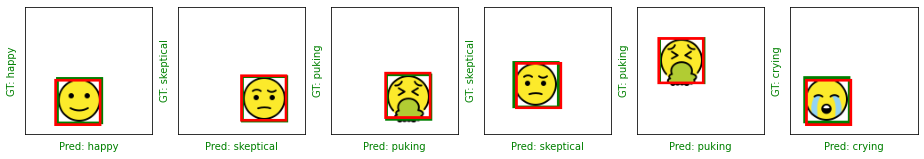

500/500 [==============================] - 159s 318ms/step - loss: 0.0010 - class_out_loss: 2.1034e-04 - box_out_loss: 8.2384e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.6978 - lr: 1.6000e-06
Epoch 25/50
1/1 [==============================] - 0s 9ms/step


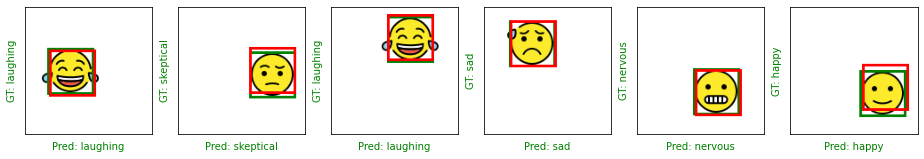

500/500 [==============================] - 159s 317ms/step - loss: 0.0010 - class_out_loss: 1.9189e-04 - box_out_loss: 8.2169e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7015 - lr: 3.2000e-07
Epoch 26/50
1/1 [==============================] - 0s 12ms/step


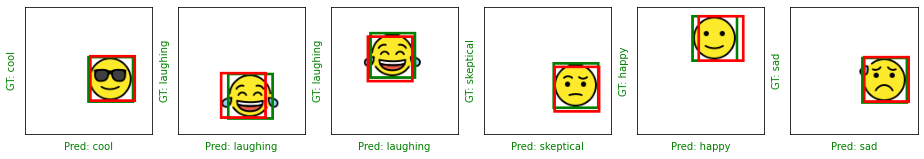

500/500 [==============================] - 158s 317ms/step - loss: 0.0010 - class_out_loss: 2.0675e-04 - box_out_loss: 7.9822e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7050 - lr: 3.2000e-07
Epoch 27/50
1/1 [==============================] - 0s 14ms/step


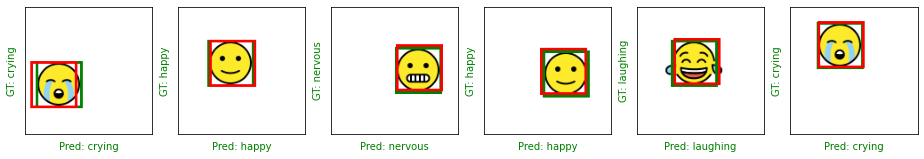

500/500 [==============================] - 159s 317ms/step - loss: 0.0010 - class_out_loss: 2.0990e-04 - box_out_loss: 8.1114e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7083 - lr: 3.2000e-07
Epoch 28/50
1/1 [==============================] - 0s 14ms/step


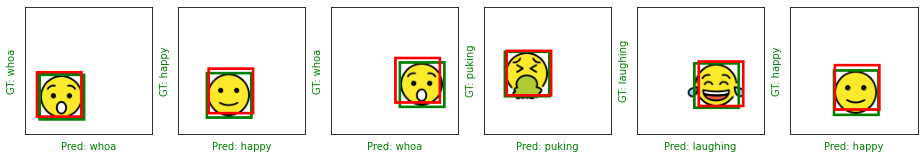

500/500 [==============================] - 161s 322ms/step - loss: 0.0010 - class_out_loss: 2.0591e-04 - box_out_loss: 8.1717e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7112 - lr: 3.2000e-07
Epoch 29/50
1/1 [==============================] - 0s 23ms/step


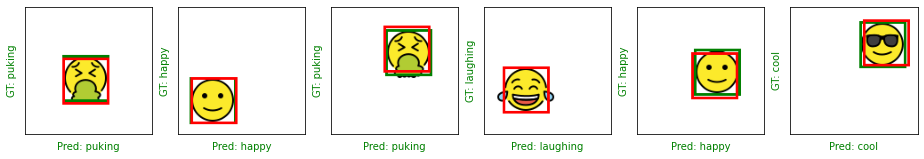

500/500 [==============================] - 160s 321ms/step - loss: 9.8387e-04 - class_out_loss: 1.8491e-04 - box_out_loss: 7.9896e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7141 - lr: 3.2000e-07
Epoch 30/50
1/1 [==============================] - 0s 23ms/step


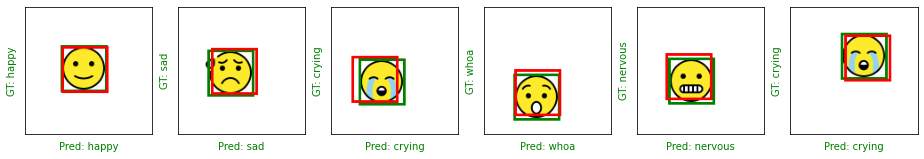

500/500 [==============================] - 160s 319ms/step - loss: 0.0010 - class_out_loss: 2.3579e-04 - box_out_loss: 7.9950e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7167 - lr: 3.0000e-07
Epoch 31/50
1/1 [==============================] - 0s 11ms/step


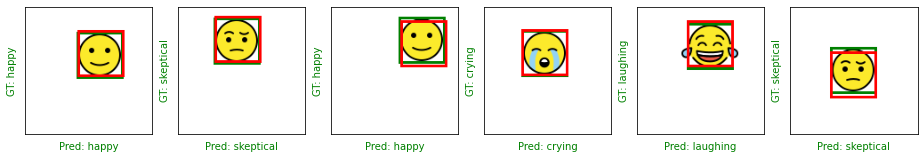

500/500 [==============================] - 160s 321ms/step - loss: 0.0011 - class_out_loss: 2.2215e-04 - box_out_loss: 8.2952e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7191 - lr: 3.0000e-07
Epoch 32/50
1/1 [==============================] - 0s 12ms/step


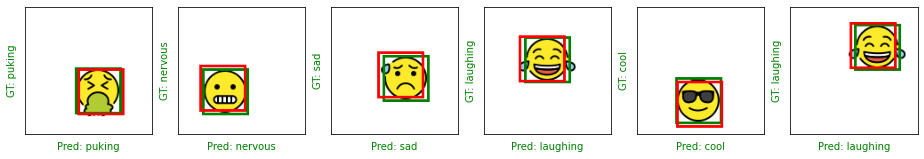

500/500 [==============================] - 160s 321ms/step - loss: 0.0010 - class_out_loss: 2.3076e-04 - box_out_loss: 7.8606e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7214 - lr: 3.0000e-07
Epoch 33/50
1/1 [==============================] - 0s 16ms/step


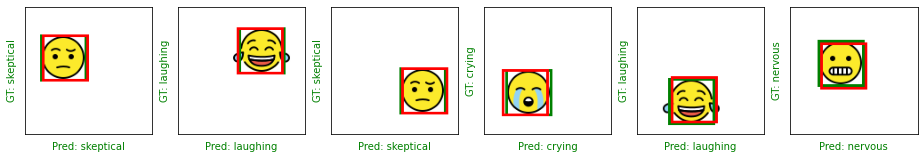

500/500 [==============================] - 161s 321ms/step - loss: 9.7252e-04 - class_out_loss: 1.9396e-04 - box_out_loss: 7.7856e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7236 - lr: 3.0000e-07
Epoch 34/50
1/1 [==============================] - 0s 11ms/step


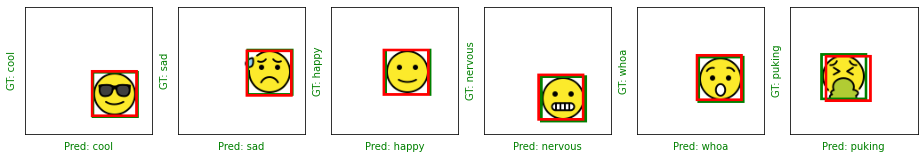

500/500 [==============================] - 161s 323ms/step - loss: 9.6313e-04 - class_out_loss: 1.7783e-04 - box_out_loss: 7.8531e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7257 - lr: 3.0000e-07
Epoch 35/50
1/1 [==============================] - 0s 21ms/step


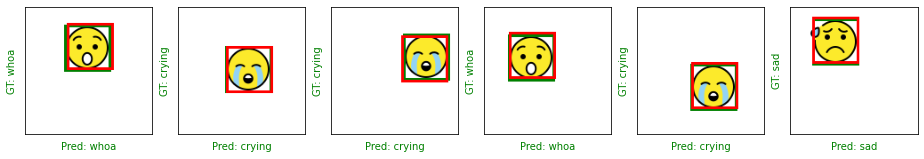

500/500 [==============================] - 161s 322ms/step - loss: 9.4946e-04 - class_out_loss: 1.6043e-04 - box_out_loss: 7.8903e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7277 - lr: 3.0000e-07
Epoch 36/50
1/1 [==============================] - 0s 15ms/step


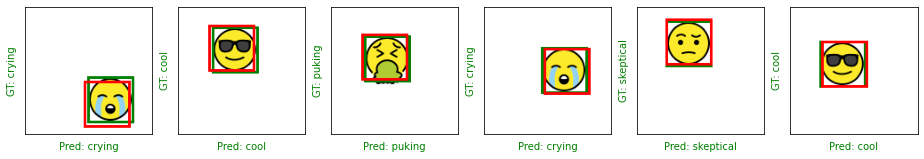

500/500 [==============================] - 160s 321ms/step - loss: 9.4428e-04 - class_out_loss: 1.6235e-04 - box_out_loss: 7.8193e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7296 - lr: 3.0000e-07
Epoch 37/50
1/1 [==============================] - 0s 16ms/step


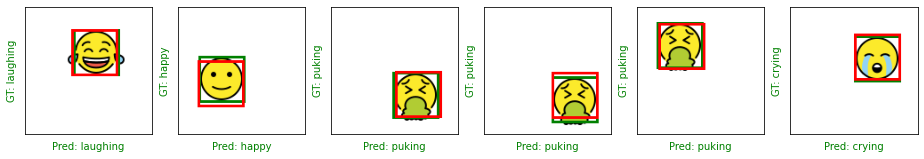

500/500 [==============================] - 160s 319ms/step - loss: 9.4873e-04 - class_out_loss: 1.7686e-04 - box_out_loss: 7.7188e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7314 - lr: 3.0000e-07
Epoch 38/50
1/1 [==============================] - 0s 16ms/step


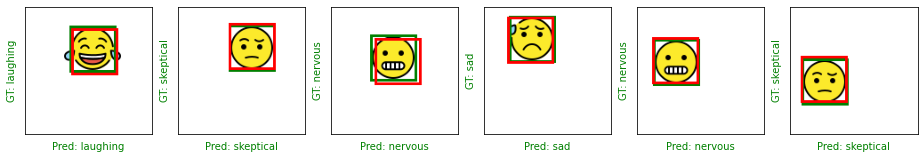

500/500 [==============================] - 160s 321ms/step - loss: 9.7631e-04 - class_out_loss: 1.8959e-04 - box_out_loss: 7.8671e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7331 - lr: 3.0000e-07
Epoch 39/50
1/1 [==============================] - 0s 16ms/step


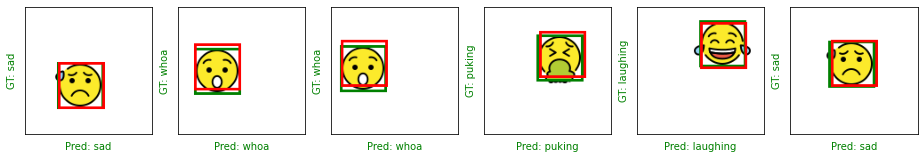

500/500 [==============================] - 156s 312ms/step - loss: 9.5960e-04 - class_out_loss: 1.9031e-04 - box_out_loss: 7.6930e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7347 - lr: 3.0000e-07
Epoch 40/50
1/1 [==============================] - 0s 11ms/step


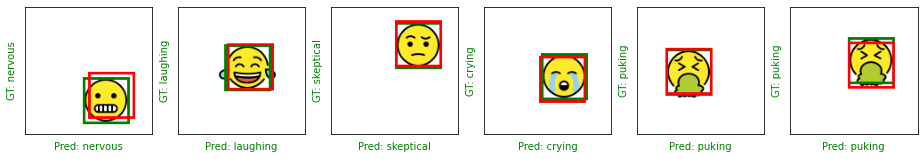

500/500 [==============================] - 157s 314ms/step - loss: 0.0010 - class_out_loss: 2.2762e-04 - box_out_loss: 7.9027e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7362 - lr: 3.0000e-07
Epoch 41/50
1/1 [==============================] - 0s 22ms/step


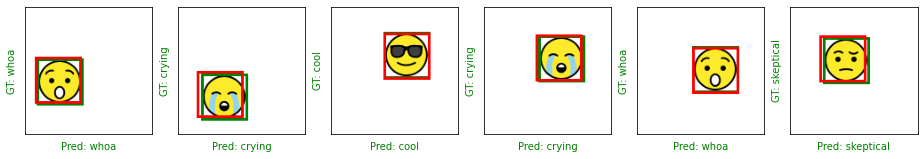

500/500 [==============================] - 158s 317ms/step - loss: 9.2848e-04 - class_out_loss: 1.6176e-04 - box_out_loss: 7.6672e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7376 - lr: 3.0000e-07
Epoch 42/50
1/1 [==============================] - 0s 14ms/step


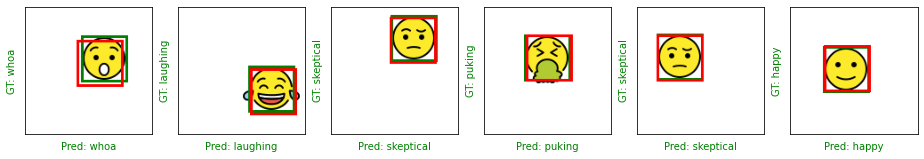

500/500 [==============================] - 159s 318ms/step - loss: 9.2474e-04 - class_out_loss: 1.7071e-04 - box_out_loss: 7.5402e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7391 - lr: 3.0000e-07
Epoch 43/50
1/1 [==============================] - 0s 23ms/step


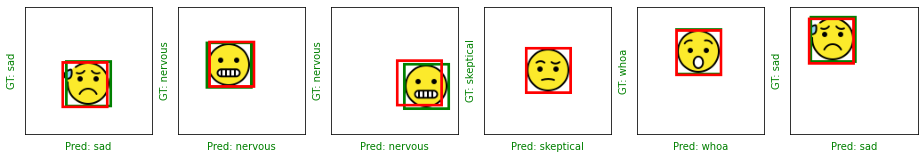

500/500 [==============================] - 158s 316ms/step - loss: 9.5245e-04 - class_out_loss: 1.7557e-04 - box_out_loss: 7.7688e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7404 - lr: 3.0000e-07
Epoch 44/50
1/1 [==============================] - 0s 16ms/step


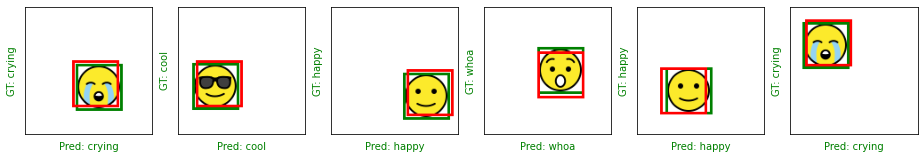

500/500 [==============================] - 159s 318ms/step - loss: 9.8392e-04 - class_out_loss: 2.0451e-04 - box_out_loss: 7.7940e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7417 - lr: 3.0000e-07
Epoch 45/50
1/1 [==============================] - 0s 18ms/step


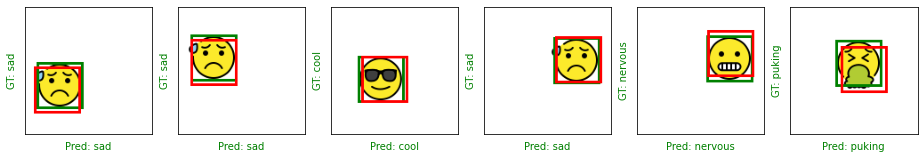

500/500 [==============================] - 159s 318ms/step - loss: 9.3992e-04 - class_out_loss: 1.7020e-04 - box_out_loss: 7.6972e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7429 - lr: 3.0000e-07
Epoch 46/50
1/1 [==============================] - 0s 11ms/step


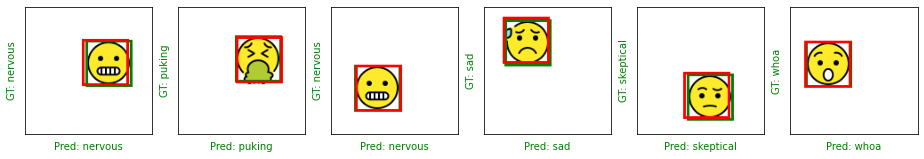

500/500 [==============================] - 158s 316ms/step - loss: 9.9965e-04 - class_out_loss: 2.3441e-04 - box_out_loss: 7.6524e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7440 - lr: 3.0000e-07
Epoch 47/50
1/1 [==============================] - 0s 17ms/step


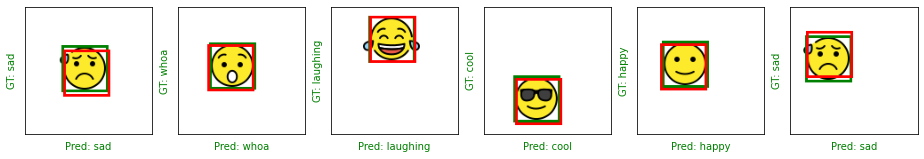

500/500 [==============================] - 158s 317ms/step - loss: 0.0010 - class_out_loss: 2.4547e-04 - box_out_loss: 7.7400e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7451 - lr: 3.0000e-07
Epoch 48/50
1/1 [==============================] - 0s 11ms/step


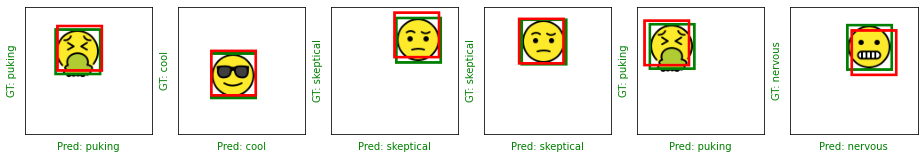

500/500 [==============================] - 158s 316ms/step - loss: 9.2962e-04 - class_out_loss: 1.7600e-04 - box_out_loss: 7.5362e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7462 - lr: 3.0000e-07
Epoch 49/50
1/1 [==============================] - 0s 19ms/step


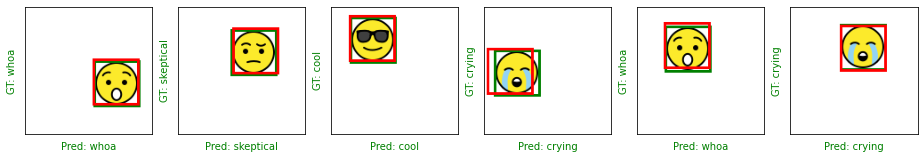

500/500 [==============================] - 159s 317ms/step - loss: 9.1557e-04 - class_out_loss: 1.7113e-04 - box_out_loss: 7.4444e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7473 - lr: 3.0000e-07
Epoch 50/50
1/1 [==============================] - 0s 13ms/step


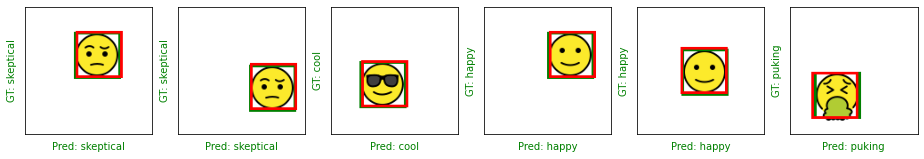

500/500 [==============================] - 158s 315ms/step - loss: 9.4161e-04 - class_out_loss: 1.6574e-04 - box_out_loss: 7.7587e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7483 - lr: 3.0000e-07


In [20]:
def lr_schedule(epoch, lr):
  if (epoch + 1) % 5 == 0:
    lr *= 0.2              #at the end of every 5 epochs, the learning rate will multiplied by 0.2 for gradient descent 
  return max(lr, 3e-7)     #compare learning rate and 0.0000003, then return the largest number. Because we want the minimum of learning rate is 0.0000003


_ = model.fit(
    data_generator(),
    epochs=50,
    steps_per_epoch=500,
    callbacks=[
               ShowTestImages(),                                                                #Custom callback
               tf.keras.callbacks.EarlyStopping(monitor='box_out_iou', patience=3, mode='max'), #Monitoring the box_out_iou for 3 epochs and if the quantity monitored has stopped increasing, then model.fit will be stop
               tf.keras.callbacks.LearningRateScheduler(lr_schedule)                            #"At the beginning of every epoch, this callback gets the updated learning rate value from schedule(lr_schedule) function"
    ]
)

In [23]:
import pickle

# save model
filename = 'savedmodels/object_localization.pkl'
pickle.dump(model, open(filename, 'wb'))

# reuse saved model
# loaded_model = pickle.load(open(filename, 'rb'))

INFO:tensorflow:Assets written to: ram://0f0d254b-c429-45ac-8464-200460c1c606/assets


INFO:tensorflow:Assets written to: ram://0f0d254b-c429-45ac-8464-200460c1c606/assets
